# Open CV basics

**Installation**

In [1]:
# install opencv through conda-forge channel
# !conda install -c conda-forge opencv


#install using pip 
# !pip install opencv -q

# Imports

In [2]:
import os 
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 

from IPython import display

In [3]:
cat_path ='../input/dogs-cats-images/dataset/training_set/cats/cat.1002.jpg'
dog_path = '../input/dogs-cats-images/dataset/training_set/dogs/dog.1000.jpg'

In [4]:
def show_image(image,
               title=None,
               cmap=None,
               fig_s=(10,6)):
    '''show loaded image'''
    plt.figure(figsize=fig_s)
    plt.imshow(image,cmap=cmap)
    plt.axis('off')
    if title:
        plt.title(f'{title}')
        
    plt.show()

# Loading and Saving Image.

**Loading a Image**

images will be loaded in BGR format in open cv


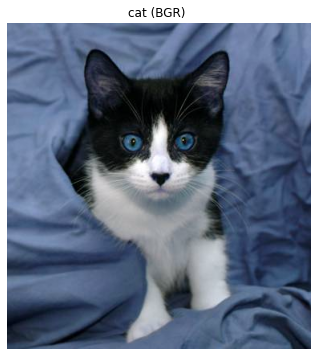

In [5]:
# load a image 

# params
# 1) filename = path to the image
# 2) flags = 1(IMREAD_COLOR:default arg),0(cv2.IMREAD_GRAYSCALE:grayscale),-1(cv2.IMREAD_UNCHANGED:unchanged)


cat_1 = cv2.imread(filename=cat_path,
                 flags=1)

print('images will be loaded in BGR format in open cv')
show_image(cat_1,'cat (BGR) ')

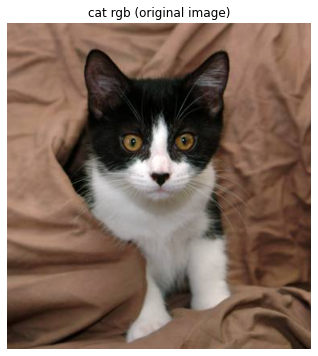

In [6]:

#convert the image from bgr to rgb
cat = cv2.cvtColor(cat_1,cv2.COLOR_BGR2RGB)

dog = cv2.imread(filename=dog_path,
                 flags=1)
show_image(cat,'cat rgb (original image)')

**Simple Algebric operations on Image**

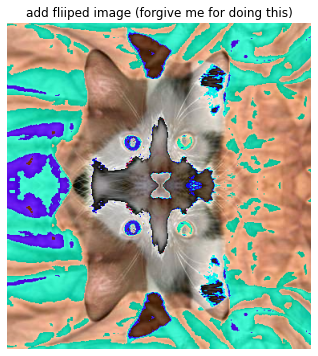

In [7]:
# add image together (origibal + flipped up-down)
show_image(cat + cat[::-1,:,:],'add fliiped image (forgive me for doing this)')

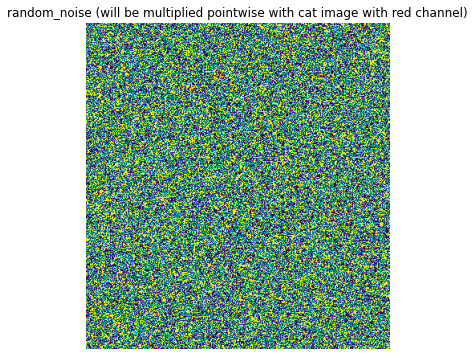

In [8]:
#create a random noisy image by multiplying with random noise 
noise = np.random.choice([0,1],size=cat.shape[:2])

ran_img = noise*cat[:,:,0]  # multiply the red channel only 

show_image(noise,'random_noise (will be multiplied pointwise with cat image with red channel)')

**Saving a Image**

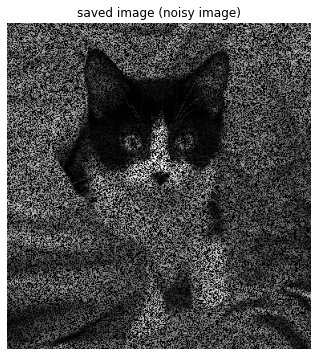

In [9]:
#save image
cv2.imwrite(filename='./ran_im.png',  #filename to save image
            img=ran_img)              # image to save 

#read image
rn_img = cv2.imread('./ran_im.png')

show_image(rn_img,'saved image (noisy image)')

# Basic Image Properties

In [10]:
#check the type of Image
type(cat)

numpy.ndarray

In [11]:
#check the dtype of Image
cat.dtype

dtype('uint8')

In [12]:
# image shape
shp=cat.shape

#number of pixels
print(f'number of pixels = {cat.size}')
print(f'height = {shp[0]},width = {shp[1]},number of channels = {shp[2]}')

number of pixels = 462759
height = 407,width = 379,number of channels = 3


# Indexing Image 

**Selecting bands**

The image elements can be indexed as we would do a numpy array

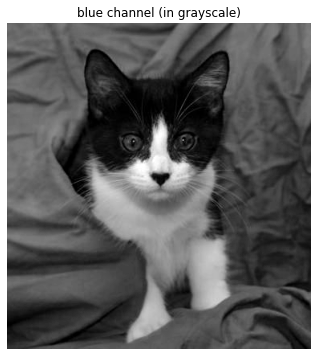

In [13]:
#selecting individual bands
red = cat[:,:,2]
green = cat[:,:,1]
blue = cat[:,:,0]


#the above operation can be performed by using this:
red,green,blue = cv2.split(cat)

#show image 
show_image(blue,cmap='gray',title='blue channel (in grayscale)')

**Merge individual color channels**

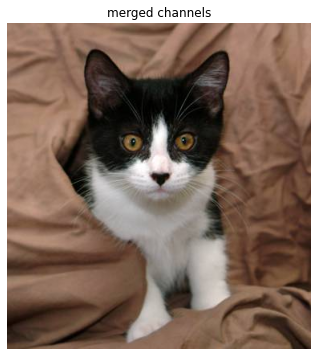

In [14]:
#merge image bands 

img_m = cv2.merge([red,green,blue])

show_image(img_m,'merged channels')

**get pixel values**

In [15]:
pix = cat[200,200,:]

print('Pixel values in Blue-Green-Red : ',pix)

Pixel values in Blue-Green-Red :  [200 192 190]


**Select specific region**

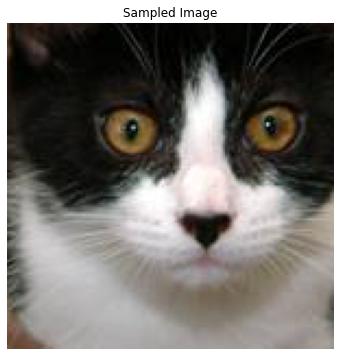

In [16]:
#select specific pixels 

sub = cat[100:250,100:250,:].copy()

show_image(sub,'Sampled Image')

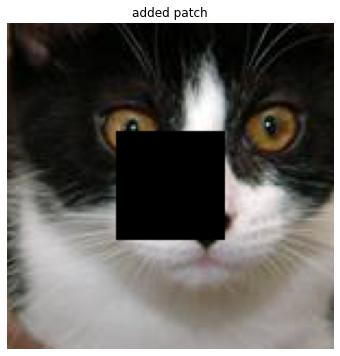

In [17]:
#change the pixel values 

sub[50:100,50:100,:] = 0

show_image(sub,'added patch')

**Create a Border Around a Image**

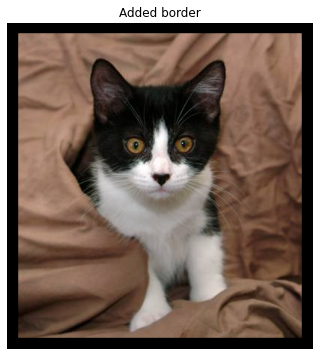

In [18]:
bordered =  cv2.copyMakeBorder(src=cat, top=15, bottom=15, left=15, right=15, borderType =cv2.BORDER_CONSTANT)

show_image(bordered,'Added border')

# Geometric Transformations on Image

**Resize a Image**

In [19]:
# check the original dimensions 
cat.shape[:2] # height,width

(407, 379)

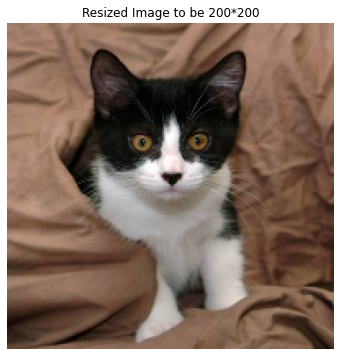

In [20]:
height, width = cat.shape[:2]

# resize using cv2.reszie
res = cv2.resize(cat,        # image 
                 (200, 200), #size 
                 interpolation = cv2.INTER_CUBIC
                )

show_image(res,f'Resized Image to be 200*200')

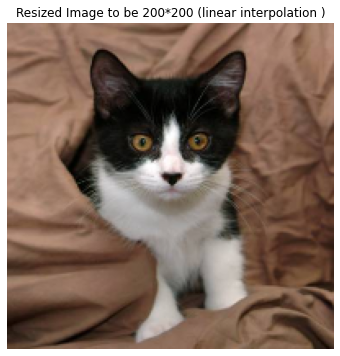

In [21]:

# resize using linear interpolation 
res = cv2.resize(cat,        # image 
                 (200, 200), #size 
                 interpolation = cv2.INTER_LINEAR
                )

show_image(res,f'Resized Image to be 200*200 (linear interpolation )')

**Translation**

    Translation is the shifting of an object's location.We will define it by x_,y_

In [22]:
x_,y_ = 120,100


# matrix defining that translation 
translation_matrix = np.float32([[1,0,x_],
                                 [0,1,y_]])
translation_matrix

array([[  1.,   0., 120.],
       [  0.,   1., 100.]], dtype=float32)

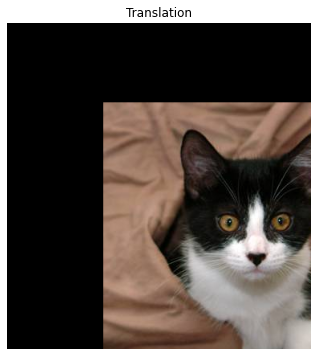

In [23]:
rows,cols = cat.shape[:2]
transl = cv2.warpAffine(cat,translation_matrix,(cols,rows))
show_image(transl,f'Translation')

**Rotation of Image**

In [24]:
#get a rotation matrix for rotaion by 90 deg
Rot_Mat = cv2.getRotationMatrix2D(center=((cols-1)/2.0,(rows-1)/2.0), # center of image
                                  angle = 90,
                                  scale=1)

#matrix defining rotation
Rot_Mat

array([[ 6.123234e-17,  1.000000e+00, -1.400000e+01],
       [-1.000000e+00,  6.123234e-17,  3.920000e+02]])

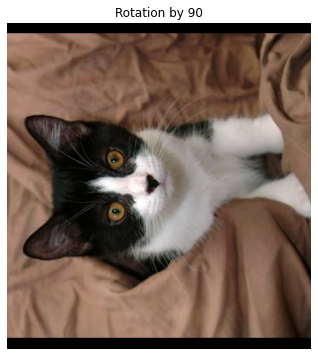

In [25]:
#perform the rotation 
rot = cv2.warpAffine(cat,Rot_Mat,(cols,rows))

show_image(rot,f'Rotation by 90')

# Changing Colorspace 
    useful in Image processing applications

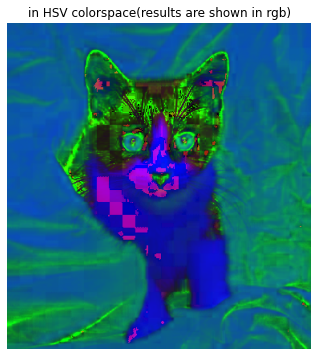

In [26]:
#convert to hsv (Hue Saturation - Value)


cat_hsv = cv2.cvtColor(cat_1,cv2.COLOR_BGR2HSV)

show_image(cat_hsv,'in HSV colorspace(results are shown in rgb)')

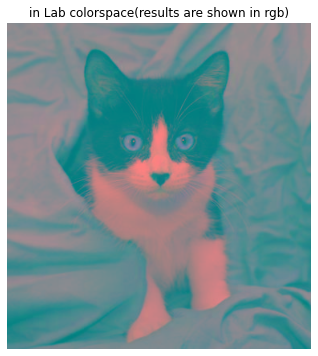

In [27]:

cat_lab = cv2.cvtColor(cat_1,cv2.COLOR_BGR2Lab)

show_image(cat_lab,'in Lab colorspace(results are shown in rgb)')

# References and resources:
* https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html
* https://opencv-tutorial.readthedocs.io/en/latest/img_proc/filters.html
* https://www.mygreatlearning.com/blog/opencv-tutorial-in-python/#sh1
